In [30]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Data Preparation

In [31]:
# Read in data
file_path = Path("crypto_data.csv")
cc_df = pd.read_csv(file_path, index_col=0)
cc_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,3.14E+11
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [32]:
# filter crypto currency to remove bad values
filtered_crypto_df = cc_df[cc_df['IsTrading'] == True]
filtered_crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [33]:
# Drop Column
new_cc_df = filtered_crypto_df.drop(["IsTrading"], axis='columns')
new_cc_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [34]:
# Filter for null values
new_cc_df.dropna(inplace=True)
new_cc_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,3.14E+11
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [35]:
# Sort and filter
# new_cc_df.dtypes
new_cc_df['TotalCoinSupply'] = pd.to_numeric(new_cc_df['TotalCoinSupply'])

new_cc_df = new_cc_df[new_cc_df['TotalCoinsMined'] > 0]


new_cc_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,3.140000e+11
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,2.100000e+07
ETH,Ethereum,Ethash,PoW,1.076842e+08,0.000000e+00
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2.000000e+09
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,2.500000e+08
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1.400223e+09
ZEN,Horizen,Equihash,PoW,7.296538e+06,2.100000e+07


In [36]:
# Drop coin name 
final_cc_df = new_cc_df.drop(["CoinName"], axis='columns')
final_cc_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
404,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
1337,X13,PoW/PoS,2.927942e+10,3.140000e+11
BTC,SHA-256,PoW,1.792718e+07,2.100000e+07
ETH,Ethash,PoW,1.076842e+08,0.000000e+00
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2.000000e+09
GAP,Scrypt,PoW/PoS,1.493105e+07,2.500000e+08
BDX,CryptoNight,PoW,9.802226e+08,1.400223e+09
ZEN,Equihash,PoW,7.296538e+06,2.100000e+07


In [37]:
# Convert into numerical format
# Create place holder values
X = pd.get_dummies(final_cc_df, columns=['Algorithm', 'ProofType'])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,3.140000e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Form dataset so the values will not be skewed 
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-0.11710444, -0.1528531 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.0939656 , -0.14499112, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.5249554 ,  4.48749054, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09560943, -0.13216038, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694444, -0.15254276, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710163, -0.15283832, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

## Dimensionality Reduction

In [39]:
# Perform dimensional reduction
pca = PCA(n_components=0.9)
crypto_pca = pca.fit_transform(X_scaled)
crypto_pca

array([[-3.35033543e-01,  1.03222275e+00, -5.90717369e-01, ...,
         1.50951648e-15,  1.93511521e-15, -2.41396193e-15],
       [-3.18368317e-01,  1.03236463e+00, -5.91129436e-01, ...,
         1.46504827e-15,  1.64130515e-15, -2.43333026e-15],
       [ 2.30456635e+00,  1.65649849e+00, -6.83610728e-01, ...,
        -4.72087159e-14, -3.25085868e-14,  5.71441810e-14],
       ...,
       [ 3.24176021e-01, -2.31231809e+00,  4.21513378e-01, ...,
         1.43075351e-14,  1.03997810e-16, -1.59258914e-14],
       [-1.49417457e-01, -2.04935034e+00,  4.12964645e-01, ...,
        -5.04853578e-16,  4.48770679e-16,  2.38601649e-16],
       [-2.89897972e-01,  8.21207344e-01, -2.76326854e-01, ...,
        -4.82584872e-16,  5.94308069e-16, -3.47858738e-16]])

In [40]:
# Reduce data set emissions
# Run t-SNE on the principal components: the output of the PCA transformation
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(crypto_pca)
tsne_features

array([[ 12.313727 ,  -1.0567997],
       [ 19.454248 ,  -2.303126 ],
       [ 27.053823 ,  -0.8279557],
       ...,
       [-18.99591  , -20.76073  ],
       [ -6.4829574, -19.98567  ],
       [-12.259288 ,   7.9133973]], dtype=float32)

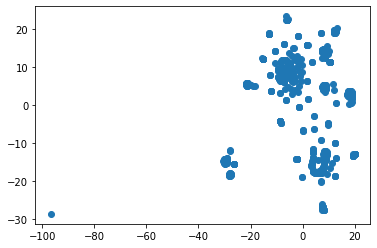

In [41]:
# Create scatterplot and look for pattern of clusters
final_cc_df['x'] = tsne_features[:,0]
final_cc_df['y'] = tsne_features[:,1]

plt.scatter(final_crypto_df['x'], final_crypto_df['y'])
plt.show()

## Cluster Analysis with k-means

C:\Users\fionn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


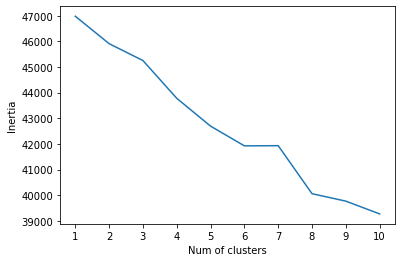

In [42]:
# Create an elbow plot to identify the best number of clusters
# Use a for-loop to determine the inertia for each k between 1 through 10
# Determine, if possible, where the elbow of the plot is, and at which value of k it appears
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Num of clusters')
plt.ylabel('Inertia')
plt.show()

The elbow seems to appear at eight clusters as the slope of the line begins to decrease it's incline at this point .This seems to align with the seven/eight clusters that can be seen in the scatter plot above.

## Recommendation

These currenies are clustered , as outliers and indentified and addressed. There seem to be seven/eight total clustrers but are hard to distinguish so I would make the recomendation to utilize seven. 